# The Sparks Foundation 

# Data Science And Business Analytics Internship (May - 2022)

# Author : Manogna Nalluri

# Task 6: Prediction using decision tree algorithm

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import andrews_curves
from sklearn.model_selection import train_test_split  
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics , tree #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


!pip install yellowbrick
from yellowbrick.classifier import ClassificationReport
%matplotlib inline

In [11]:
data=pd.read_csv('iris.csv', encoding='latin1')
data.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
X = data.drop(['Species','Id'],axis=1)
y = data['Species']

# Data Visualization


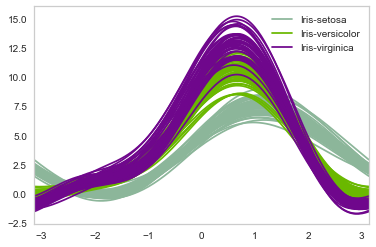

In [13]:
# plot andrews_curves
andrews_curves(data.drop("Id", axis=1), "Species")
plt.show()


In [14]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=data["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


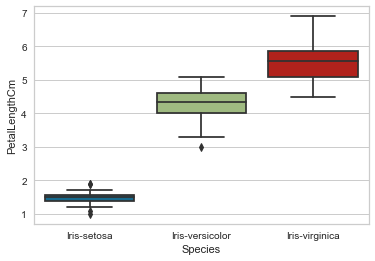

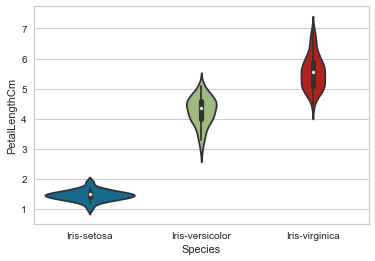

In [15]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)

plt.show()
sns.violinplot(x="Species",y="PetalLengthCm",data=data)
plt.show() 

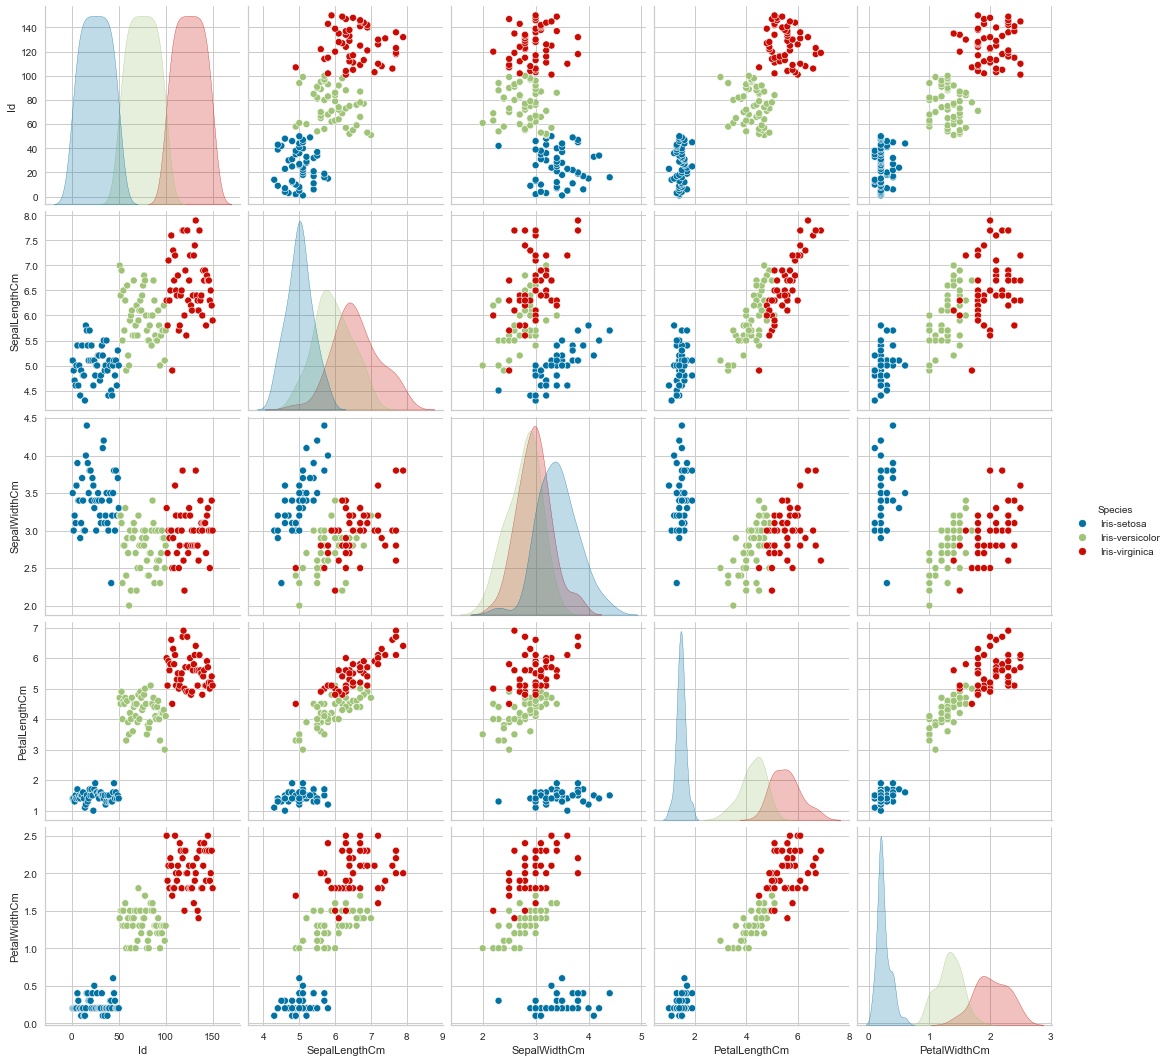

In [17]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Species",size=3);
plt.show() 

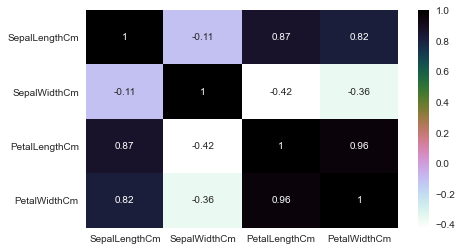

In [18]:
plt.figure(figsize=(7,4)) 
sns.heatmap(X.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [19]:
# split data to train and test with 80% 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0,shuffle=True, stratify=y) 
# X_train.shape

In [20]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))
print('The F1 Score of the Decision Tree is',metrics.f1_score(prediction,y_test,average='weighted'   ))

The accuracy of the Decision Tree is 0.9666666666666667
The F1 Score of the Decision Tree is 0.966750208855472


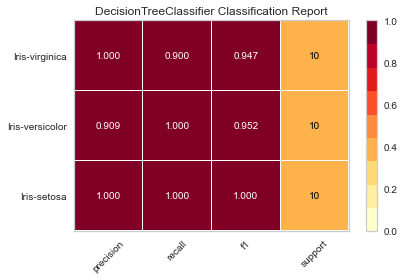

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [21]:
classes = y.unique()
y
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure